In [1]:
!pip install openpyxl


  Using cached openpyxl-3.1.2-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [12]:
import pandas as pd

df = pd.read_excel(r'C:\Users\SHREYA\OneDrive\Desktop\dummy\washington_subset.xlsx')

df.head()


,article,highlights,id
0,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
1,WASHINGTON (CNN) -- White House press secretar...,"President Bush says Tony Snow ""will battle can...",5e22bbfc7232418b8d2dd646b952e404df5bd048
2,WASHINGTON (CNN) -- As he awaits a crucial pro...,President Bush to address the Veterans of Fore...,017d27d00eb43678c15cb4a8dd4723a035323219
3,WASHINGTON (CNN) -- Vice President Dick Cheney...,President Bush will have a routine colonoscopy...,35f0e33de7923036a97ac245d899f990bda5e242
4,"WASHINGTON (CNN) -- There is ""no remaining hop...",NEW: President Bush says he and first lady are...,0d43b97000ff852282c89d8d105e41495c0ee9bd


In [4]:
!pip install scikit-learn


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.6 kB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.3.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 2.0 MB/s eta 0:00:06
    --------------------------------------- 0.2/10.6 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.3/10.6 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.5/10.6 MB 2.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/10.6 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/10.6 MB 2.7 MB/s eta 0:00:04
   --- ------------------------

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df["article"])

df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(df_tfidf)


        000        10       100        11       135        14       142  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.022153  0.022153  0.000000  0.000000  0.000000  0.056962  0.000000   
2  0.015444  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.016522  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6  0.037050  0.000000  0.018677  0.037354  0.000000  0.000000  0.000000   
7  0.037198  0.018599  0.000000  0.000000  0.028128  0.000000  0.000000   
8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9  0.000000  0.018897  0.000000  0.000000  0.000000  0.024295  0.028579   

        150       160       168  ...     worth     would   wracked     wrote  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0

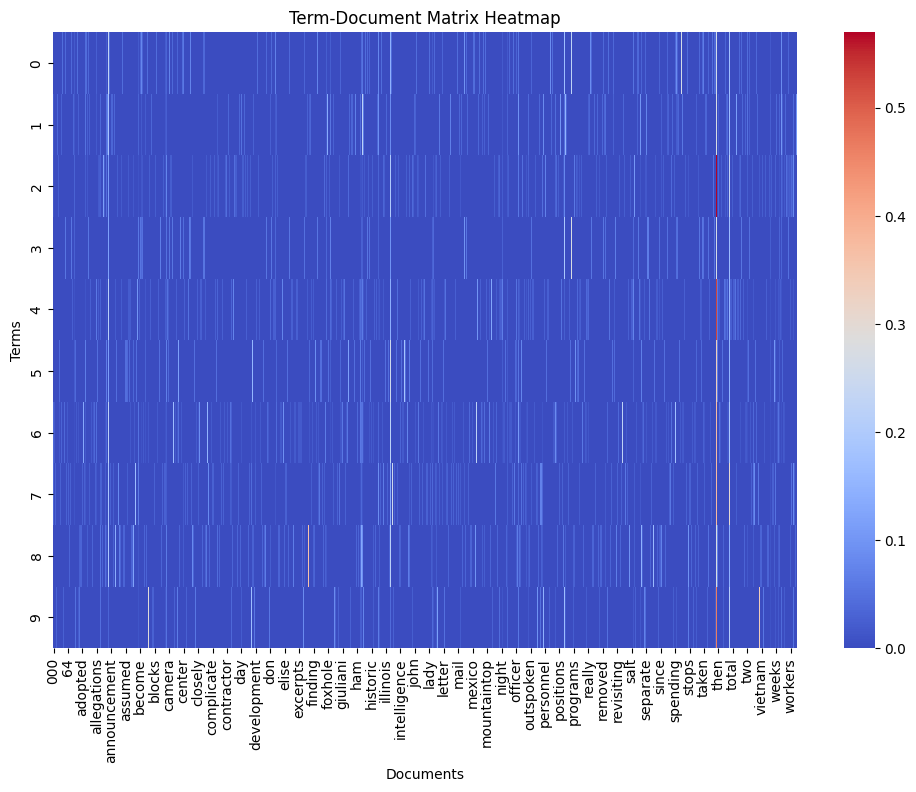

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df_tfidf, cmap='coolwarm')
plt.title('Term-Document Matrix Heatmap')
plt.xlabel('Documents')
plt.ylabel('Terms')
plt.show()
